In [47]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib notebook
from ipywidgets import *

from matplotlib.lines import Line2D

In [48]:
f = open("../test_data/1117/2021-11-17-15-25-20.txt", 'r')
# f = open("C:/BabyDeveloper-main/test_data/2021-11-17-15-25-20.txt", 'r')


data = []
frame = -1
odd_b = False
temp, x, y, z = [], [], [], []
odd_number = 5

snr = 160

for i in range(odd_number):
    x.append([])
    y.append([])
    z.append([])
temp_x, temp_y, temp_z = [], [], []
frame_num = -1

lines = f.readlines()
for line in lines:
    x_index = line.find(' x: ')
    y_index = line.find('y: ')
    z_index = line.find('z: ')
    snr_index = line.find('snr: ')
    temp_index = line.find('doppler: ')
    
    if (line.startswith('point_id: 0 ')) and odd_b and frame >= odd_number - 1 : # line이 'point_id: 0'으로 시작하고, 3 frame 단위라면
        for i in range(odd_number):
            temp_x.append(x[i]) # 임시 x값
            temp_y.append(y[i]) # 임시 y값
            temp_z.append(z[i]) # 임시 z값
        org_x = [item for sub_list in temp_x for item in sub_list] # x값 1차원화
        org_y = [item for sub_list in temp_y for item in sub_list] # y값 1차원화
        org_z = [item for sub_list in temp_z for item in sub_list] # z값 1차원화
        data.append([org_x, org_y, org_z])
        odd_b = False
        frame_num = frame_num % odd_number - 1
        x[frame_num] = []
        y[frame_num] = []
        z[frame_num] = []
        temp_x, temp_y, temp_z = [], [], []
    
    elif line.startswith('point_id: 0 '):
        frame += 1
        frame_num += 1
    
    if x_index != -1 : # x의 index가 -1이 아니라면
        print(line[snr_index+4:snr + snr_index+5])
        if float(line[snr_index+4:snr+snr_index+5]) < snr:
            continue
        else:
            x[frame_num].append(float(line[x_index + 3:y_index-1]))
            y[frame_num].append(float(line[y_index + 3:z_index-1]))
            z[frame_num].append(float(line[z_index + 3:temp_index-1]))
    
    if frame % odd_number == odd_number - 1: # 정해둔 frame 단위라면
        odd_b = True
    
f.close()

 90.0

 95.0

 95.0

 82.0

 88.0

 88.0

 82.0

 91.0

 91.0

 90.0

 90.0

 133.0

 133.0

 76.0

 163.0

 163.0

 185.0

 185.0

 152.0

 79.0

 79.0

 175.0

 175.0

 209.0

 209.0

 183.0

 169.0

 169.0

 204.0

 204.0

 184.0

 184.0

 137.0

 137.0

 175.0

 175.0

 160.0

 160.0

 119.0

 119.0

 95.0

 95.0

 92.0

 92.0

 140.0

 140.0

 117.0

 117.0

 91.0

 105.0

 77.0

 148.0

 148.0

 138.0

 138.0

 119.0

 119.0

 174.0

 174.0

 158.0

 158.0

 89.0

 89.0

 113.0

 113.0

 171.0

 171.0

 157.0

 157.0

 90.0

 90.0

 135.0

 135.0

 125.0

 125.0

 127.0

 161.0

 182.0

 140.0

 204.0

 204.0

 212.0

 212.0

 167.0

 167.0

 146.0

 203.0

 203.0

 210.0

 210.0

 163.0

 163.0

 105.0

 159.0

 159.0

 170.0

 170.0

 119.0

 120.0

 120.0

 93.0

 93.0

 80.0

 80.0

 106.0

 111.0

 87.0

 87.0

 82.0

 82.0

 151.0

 151.0

 183.0

 183.0

 170.0

 78.0

 78.0

 78.0

 77.0

 77.0

 84.0

 84.0

 83.0

 83.0

 103.0

 90.0

 169.0

 169.0

 154.0

 154.0

 1

 232.0

 232.0

 244.0

 244.0

 186.0

 186.0

 188.0

 138.0

 138.0

 202.0

 202.0

 250.0

 250.0

 154.0

 154.0

 217.0

 217.0

 250.0

 250.0

 175.0

 175.0

 138.0

 138.0

 198.0

 198.0

 250.0

 250.0

 180.0

 180.0

 142.0

 142.0

 104.0

 104.0

 147.0

 147.0

 136.0

 202.0

 202.0

 124.0

 124.0

 136.0

 136.0

 138.0

 138.0

 85.0

 85.0

 138.0

 138.0

 140.0

 140.0

 135.0

 149.0

 119.0

 84.0

 136.0

 139.0

 98.0

 79.0

 79.0

 112.0

 115.0

 92.0

 76.0

 81.0

 109.0

 102.0

 122.0

 113.0

 113.0

 233.0

 233.0

 205.0

 205.0

 120.0

 120.0

 224.0

 224.0

 195.0

 195.0

 106.0

 106.0

 110.0

 110.0

 122.0

 122.0

 161.0

 148.0

 84.0

 84.0

 77.0

 111.0

 147.0

 125.0

 93.0

 109.0

 110.0

 110.0

 90.0

 90.0

 183.0

 177.0

 177.0

 101.0

 207.0

 207.0

 194.0

 194.0

 116.0

 220.0

 220.0

 199.0

 199.0

 108.0

 217.0

 92.0

 96.0

 89.0

 98.0

 98.0

 129.0

 143.0

 113.0

 113.0

 85.0

 85.0

 88.0

 88.0

 142.0




 75.0

 107.0

 117.0

 88.0

 94.0

 132.0

 130.0

 81.0

 95.0

 79.0

 113.0

 165.0

 154.0

 90.0

 87.0

 96.0

 84.0

 126.0

 175.0

 162.0

 78.0

 161.0

 155.0

 166.0

 166.0

 158.0

 158.0

 163.0

 163.0

 105.0

 105.0

 116.0

 116.0

 93.0

 94.0

 94.0

 88.0

 88.0

 78.0

 78.0

 108.0

 121.0

 91.0

 100.0

 100.0

 197.0

 197.0

 226.0

 226.0

 194.0

 194.0

 106.0

 106.0

 204.0

 204.0

 228.0

 228.0

 194.0

 121.0

 178.0

 178.0

 200.0

 200.0

 174.0

 120.0

 175.0

 175.0

 202.0

 182.0

 130.0

 115.0

 93.0

 123.0

 107.0

 107.0

 98.0

 86.0

 86.0

 165.0

 165.0

 159.0

 159.0

 126.0

 126.0

 166.0

 166.0

 143.0

 143.0

 152.0

 152.0

 188.0

 188.0

 137.0

 174.0

 174.0

 184.0

 184.0

 192.0

 192.0

 139.0

 139.0

 83.0

 83.0

 145.0

 145.0

 149.0

 149.0

 93.0

 93.0

 105.0

 105.0

 95.0

 95.0

 108.0

 108.0

 105.0

 105.0

 89.0

 89.0

 85.0

 85.0

 79.0

 79.0

 87.0

 87.0

 168.0

 168.0

 120.0

 116.0

 120

 187.0

 187.0

 178.0

 124.0

 112.0

 161.0

 156.0

 105.0

 104.0

 155.0

 145.0

 75.0

 75.0

 91.0

 91.0

 95.0

 142.0

 80.0

 80.0

 80.0

 80.0

 111.0

 111.0

 103.0

 103.0

 91.0

 91.0

 86.0

 86.0

 152.0

 152.0

 183.0

 183.0

 170.0

 170.0

 201.0

 201.0

 170.0

 170.0

 165.0

 165.0

 198.0

 198.0

 174.0

 174.0

 186.0

 186.0

 179.0

 179.0

 89.0

 89.0

 88.0

 88.0

 115.0

 107.0

 114.0

 145.0

 157.0

 157.0

 172.0

 161.0

 185.0

 95.0

 102.0

 165.0

 165.0

 176.0

 176.0

 168.0

 168.0

 190.0

 190.0

 149.0

 149.0

 172.0

 172.0

 148.0

 175.0

 153.0

 180.0

 159.0

 140.0

 169.0

 169.0

 161.0

 192.0

 192.0

 160.0

 160.0

 172.0

 196.0

 196.0

 157.0

 157.0

 212.0

 212.0

 257.0

 257.0

 244.0

 244.0

 161.0

 161.0

 218.0

 218.0

 258.0

 258.0

 242.0

 242.0

 158.0

 158.0

 159.0

 87.0

 87.0

 164.0

 164.0

 179.0

 179.0

 153.0

 153.0

 183.0

 183.0

 157.0

 157.0

 168.0

 225.0

 209.0

 145.0

 210


 236.0

 216.0

 216.0

 213.0

 213.0

 173.0

 173.0

 110.0

 240.0

 240.0

 211.0

 211.0

 121.0

 121.0

 128.0

 128.0

 252.0

 252.0

 234.0

 234.0

 162.0

 104.0

 228.0

 228.0

 215.0

 215.0

 149.0

 137.0

 217.0

 170.0

 173.0

 173.0

 273.0

 273.0

 233.0

 233.0

 166.0

 265.0

 222.0

 222.0

 101.0

 101.0

 124.0

 219.0

 178.0

 178.0

 94.0

 94.0

 87.0

 87.0

 123.0

 123.0

 173.0

 173.0

 127.0

 176.0

 176.0

 110.0

 110.0

 170.0

 254.0

 254.0

 225.0

 225.0

 185.0

 185.0

 258.0

 258.0

 226.0

 226.0

 135.0

 135.0

 75.0

 75.0

 174.0

 174.0

 243.0

 243.0

 195.0

 195.0

 136.0

 86.0

 86.0

 155.0

 155.0

 147.0

 147.0

 183.0

 183.0

 113.0

 113.0

 174.0

 174.0

 222.0

 222.0

 119.0

 119.0

 187.0

 187.0

 238.0

 238.0

 133.0

 133.0

 152.0

 152.0

 230.0

 230.0

 118.0

 118.0

 180.0

 180.0

 233.0

 233.0

 154.0

 154.0

 126.0

 126.0

 186.0

 186.0

 228.0

 228.0

 150.0

 150.0

 120.0

 120.0

 168.0


In [49]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

<IPython.core.display.Javascript object>


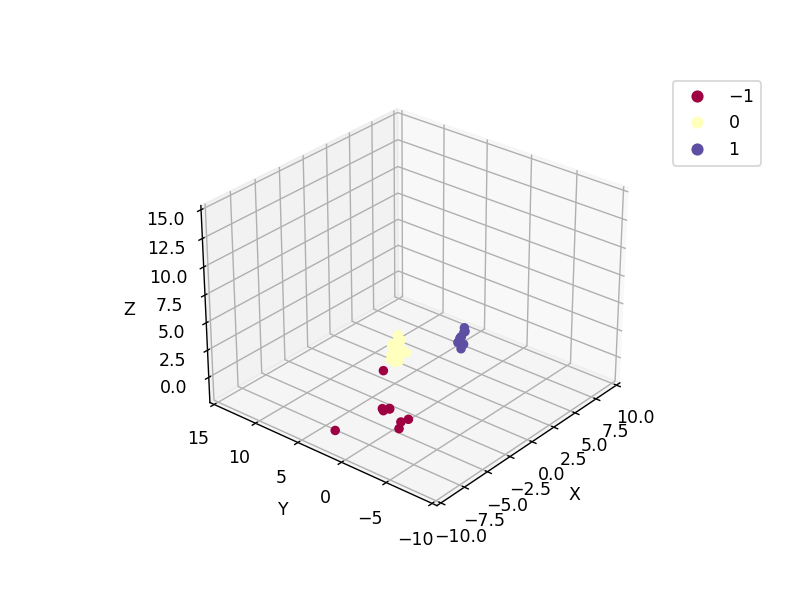

interactive(children=(IntSlider(value=131, description='i', max=393, min=-131), Output()), _dom_classes=('widg…

<function __main__.update(i=0)>

In [50]:
model = DBSCAN(eps=1.5,min_samples=8)

updateData = []

for i in range(len(data)) :
    pdData = pd.DataFrame({"x" : data[i][0], "y" : data[i][1], "z" : data[i][2]})

    # create model and prediction{{
    predict = pd.DataFrame(model.fit_predict(pdData))
    predict.columns=['predict']

    # concatenate labels to df as a new column
    r = pd.concat([pdData,predict],axis=1)
    
    updateData.append(r)
    
fig = plt.figure()
ax = Axes3D(fig)
    
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
cmap = plt.cm.Spectral

def update(i=0) :
    ax = plt.axes(projection='3d')
#     ax.view_init(90, 0)
    ax.view_init(30, 120)
    ax.set_xlim(10, -10)
    ax.set_ylim(15, -10)
    ax.set_zlim(-2, 15)
    
    sc = ax.scatter(updateData[i]["x"], updateData[i]["y"], updateData[i]["z"], c=updateData[i]["predict"], marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # legend
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
    
    
     
interact(update, i = len(data) // 3)